In [1]:
import osmnx as ox
import networkx as nx
import itertools
import numpy as np
from shapely.geometry import Polygon, LineString, Point, MultiPoint
from shapely import wkt

In [2]:
# Fallenbrunnen

polygon = wkt.loads(u'POLYGON ((9.444757321553571 47.6640820372137, 9.44469147049122 47.6642370363376, 9.442746638836271 47.6675223477341, 9.44273323863089 47.6675486765942, 9.44272335456083 47.6675846924473, 9.44272337322715 47.6675856076278, 9.44272365679015 47.667586502615, 9.442724194246059 47.6675873426787, 9.442724964738851 47.6675880952201, 9.442725938369239 47.6675887310364, 9.442771524985689 47.6676085195463, 9.442809078141879 47.6676199425426, 9.443599054706221 47.6678292167847, 9.44364298889086 47.6678391758214, 9.44369319196211 47.6678454078942, 9.443694609235431 47.6678454056071, 9.44369600193242 47.6678452280573, 9.443697323077419 47.6678448812336, 9.443698528108349 47.6678443768344, 9.443744598701199 47.6678160313241, 9.443795360184319 47.6677784822092, 9.443991191770809 47.6676599114601, 9.44421793991903 47.667570002951, 9.44446657647225 47.667512336406, 9.44472720190474 47.6674892078198, 9.444989439424219 47.6675015380556, 9.445052589744799 47.6675088406224, 9.445117064489731 47.6675174206873, 9.445183601261711 47.6675274468952, 9.44523747329856 47.6675300193568, 9.445238809309229 47.6675299032106, 9.4452400852424 47.6675296113077, 9.445241251079061 47.667529155091, 9.445242261116221 47.6675285524453, 9.445243075758549 47.6675278269953, 9.44524366307046 47.6675270071801, 9.445257172339209 47.6674916444378, 9.44526138400154 47.6674643786881, 9.44526635876986 47.6674027181877, 9.44527842375639 47.6673216144847, 9.44528702520314 47.6672820624034, 9.445343690252869 47.6671237851091, 9.44544200701166 47.6669751340207, 9.445578690330031 47.6668410756375, 9.445606929899901 47.666818179473, 9.445637520256669 47.6667867600046, 9.445694232828229 47.6667392820943, 9.445718033000571 47.6667110812337, 9.445816550854619 47.6665782840333, 9.445885789521761 47.6664961432372, 9.44592142419992 47.6664586450851, 9.44609642847751 47.6663115101204, 9.446313359526091 47.6661926345661, 9.44656247099808 47.6661073591621, 9.4468325709589 47.6660595150674, 9.447111524661491 47.6660512517601, 9.44717730910928 47.6660540322315, 9.447316189895529 47.6660649297759, 9.44753610831893 47.6660902456686, 9.44758112940486 47.6660938580278, 9.44767071891042 47.6660918313842, 9.447684852061499 47.6660900296329, 9.44774691292624 47.6660795923001, 9.4479881800759 47.6660547725018, 9.448232085468209 47.6660604809193, 9.448470258112661 47.6660965216365, 9.448560914386359 47.6661163562617, 9.44857404167368 47.6661182063231, 9.448691583060739 47.6661430580836, 9.44873711713312 47.6661476818212, 9.44936429835351 47.6661892570172, 9.44940607834077 47.66619064719, 9.44946122599818 47.6661870380657, 9.449463401923399 47.6661858503929, 9.449498075077059 47.6661578721339, 9.449520006942709 47.6661337837734, 9.45042894326825 47.6650175089795, 9.45044714891934 47.6649921250378, 9.450463499380801 47.6649559172176, 9.450463614247271 47.6649550512483, 9.450463463599689 47.664954187754, 9.450463053866351 47.6649533635807, 9.45046240253088 47.6649526138965, 9.450461537386341 47.6649519706911, 9.450460495349169 47.6649514614106, 9.45040935260457 47.6649360626301, 9.45036907619812 47.664928709451, 9.447377834868041 47.6644933952575, 9.447343269935271 47.6644880343118, 9.44730847614896 47.6644823034133, 9.44727413690042 47.6644763151236, 9.444928887305879 47.6640444576946, 9.444886220360861 47.6640381906818, 9.444829205115131 47.6640359557828, 9.4448279422305 47.6640360849357, 9.44482674602855 47.6640363876611, 9.44482566804831 47.6640368509158, 9.444757321553571 47.6640820372137))')

In [3]:
place_name = 'Soldiner Kiez, Gesundbrunnen, Berlin, Germany'
#graph = ox.graph_from_place(place_name, network_type='drive_service', simplify=False)
graph = ox.graph_from_polygon(polygon, network_type='drive_service', simplify=False, retain_all=True)
graph = ox.project_graph(graph, to_crs='epsg:3035')
graph = ox.get_undirected(graph)

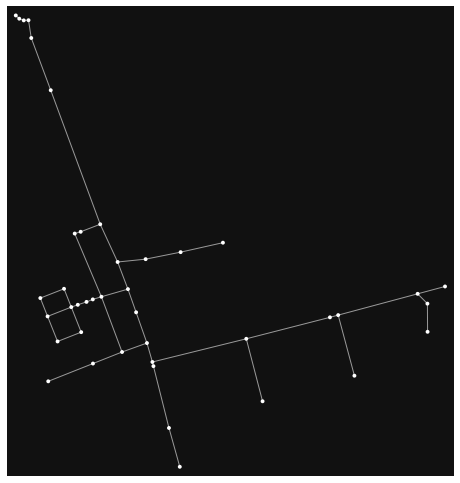

In [4]:
# plot graph

fig, ax = ox.plot_graph(graph, show=False, close=False)
fig.set_figheight(13)

In [5]:
nodes, edges = ox.graph_to_gdfs(graph)
len(edges)

45

In [6]:
edges.head(5)

osmid             name      highway  oneway  \
u          v          key                                                    
70844016   1437615049 0      9357204    Fallenbrunnen  residential   False   
           247479382  0    780232073    Fallenbrunnen  residential   False   
           671764568  0    780800204  Glärnischstraße  residential   False   
1437615049 70844086   0      9357204    Fallenbrunnen  residential   False   
           1437615048 0    130568401    Fallenbrunnen      service   False   

                           length        from          to  \
u          v          key                                   
70844016   1437615049 0    74.418  1437615049    70844016   
           247479382  0    15.226   247479382    70844016   
           671764568  0     3.312   671764568    70844016   
1437615049 70844086   0    66.497    70844086  1437615049   
           1437615048 0    49.885  1437615048  1437615049   

                                                                    geometry  \
u          v          key                                                      
70844016   1437615049 0    LINESTRING (4279409.017 2728123.583, 4279336.5...   
           247479382  0    LINESTRING (4279332.304 2728120.302, 4279336.5...   
           671764568  0    LINESTRING (4279337.315 2728102.463, 4279336.5...   
1437615049 70844086   0    LINESTRING (4279473.637 2728140.168, 4279409.0...   
           1437615048 0    LINESTRING (4279421.601 2728075.331, 4279409.0...   

                          maxspeed   service tunnel junction  
u          v          key                                     
70844016   1437615049 0        NaN       NaN    NaN      NaN  
           247479382  0         30       NaN    NaN      NaN  
           671764568  0         30       NaN    NaN      NaN  
1437615049 70844086   0        NaN       NaN    NaN      NaN  
           1437615048 0         30  driveway    NaN      NaN

In [9]:
# subdivide graph's edges

graph_subdiv = graph.copy()
edges = graph.edges()

edge_data = []
node_data = []
#edge_id = 100100 # 100000 ... edge from OSMNX function; 100X00 ... X is edge no; 100X0Y ... Y is segment no

concat_0 = '0'

for u,v in edges:
    
    linestring = graph.edges[u,v,0]['geometry']
    vertices = ox.utils_geo.interpolate_points(linestring, 20) # divide into 20m segments ###
    vertices = list(vertices) ###
    # print(vertices) ###
    highway = graph.edges[u,v,0]['highway']
    osmid = graph.edges[u,v,0]['osmid']
    fromid = graph.edges[u,v,0]['from']
    toid = graph.edges[u,v,0]['to']
    edge_id = fromid + toid
    vertex_node_id = []

    
    for num,node in enumerate(list(vertices)[1:-1], start=1):
        x,y = node[0],node[1] ###
        
        # ensure synthetic node id does not exist in graph.
        # increment name by 1 if exist and check again
        skip_num_by=0
        while True:

            # first name edge_id + 0 + 1(=num) + 0(=skip_num_by)
            name = int(str(edge_id) + concat_0 + str(num+skip_num_by))
            if name in graph.nodes():

                print('TAKE CARE! THIS SYNTHETIC NODE ALREADY EXISTS IN GRAPH. NODE', name)
                skip_num_by +=1

            else:

                break
        
        
        node_data.append([name,x,y,(u,v)])
        vertex_node_id.append(name)
    
    if vertices[0] == (graph.nodes[v]['x'],graph.nodes[v]['y']): ###
        vertex_node_id.insert(0, v)
        vertex_node_id.append(u)
    else:
        vertex_node_id.insert(0, u)
        vertex_node_id.append(v)
    
    for i,j in zip(range(len(list(vertices))-1), range(len(vertex_node_id)-1)):
        line = LineString([vertices[i], vertices[i+1]])
        edge_data.append([vertex_node_id[j], vertex_node_id[j+1], line, line.length, highway, osmid])
        
    
#build new graph    
        
graph_subdiv.remove_edges_from(edges)

for u,v,line,leng,highway,osmid in edge_data:
    graph_subdiv.add_edge(u,v,geometry=line,length=leng,highway=highway,osmid=osmid)

for name,x,y,pos in node_data:
    graph_subdiv.add_node(name,x=x,y=y)

old: 43
new: 66


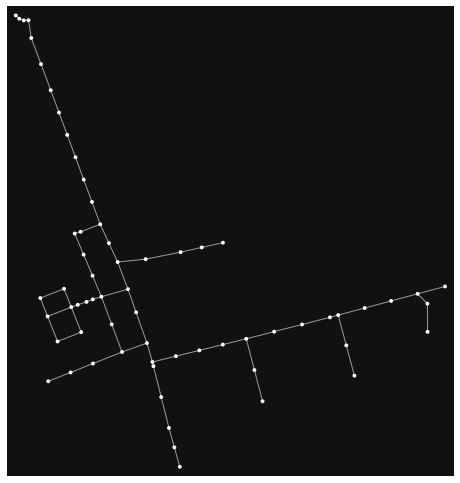

In [10]:
# plot subdivided graph

fig, ax = ox.plot_graph(graph_subdiv, show=False, close=False)
fig.set_figheight(13)
print('old:', graph.number_of_nodes())
print('new:', graph_subdiv.number_of_nodes())

In [11]:
# convert undirected graph to digraph
digraph = nx.MultiGraph(graph_subdiv)
digraph = digraph.to_directed()
digraph.number_of_edges()

136

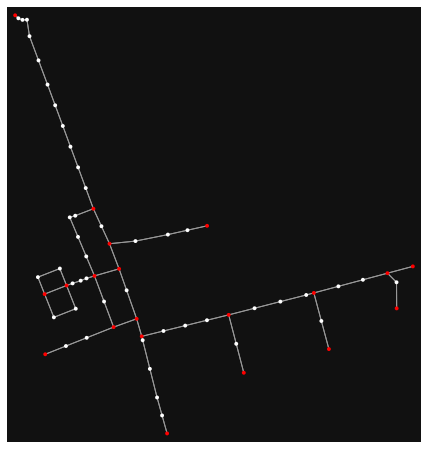

In [12]:
# identify edge endpoints
nc = ["r" if ox.simplification._is_endpoint(digraph, node) else "w" for node in digraph.nodes()]
fig, ax = ox.plot_graph(digraph, node_color=nc)

In [13]:
# preprocessing buildings

#buildings = ox.geometries_from_place(place_name, tags={'building':True})
buildings = ox.geometries_from_polygon(polygon, tags={'building':True})
buildings = ox.projection.project_gdf(buildings, to_crs='epsg:3035', to_latlong=False)

# new columns

buildings['centroid'] = buildings['geometry'].representative_point()
buildings['load'] = buildings['geometry'].area

# reduce df 

building_loads = buildings[['load','centroid']].droplevel(0)

# nearest street nodes from building centroids

centr_x = buildings['centroid'].x.tolist()
centr_y = buildings['centroid'].y.tolist()

building_loads['nn'] = ox.distance.nearest_nodes(graph_subdiv, centr_x, centr_y)
building_loads['nn_coords'] = building_loads['nn'].apply(lambda row : Point(graph_subdiv.nodes[row]['x'], graph_subdiv.nodes[row]['y']))

# assign building loads to street nodes

street_loads = building_loads.groupby(['nn']).load.sum().reset_index().set_index('nn')
street_load_nodes = street_loads.index.tolist()

In [14]:
# get nodes to keep

endpoints = [n for n in digraph.nodes if ox.simplification._is_endpoint(digraph, n, strict=True)]
nodes_to_keep = list(set(endpoints + street_load_nodes))

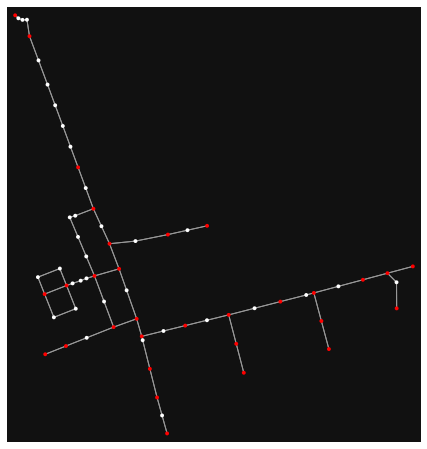

In [15]:
nc = ["r" if node in nodes_to_keep else "w" for node in digraph.nodes()]
fig, ax = ox.plot_graph(digraph, node_color=nc)

In [17]:
# modified osmnx function (extended by nodes_to_keep)
# feststellen welche knoten behalten und welche weg. build paths.

def _get_paths_to_simplify(G, nodes_to_keep, strict=True):
    """
    Generate all the paths to be simplified between endpoint nodes.
    The path is ordered from the first endpoint, through the interstitial nodes,
    to the second endpoint.
    Parameters
    ----------
    G : networkx.MultiDiGraph
        input graph
    strict : bool
        if False, allow nodes to be end points even if they fail all other rules
        but have edges with different OSM IDs
    Yields
    ------
    path_to_simplify : list
    """
    
    
    # for each endpoint node, look at each of its successor nodes
    for endpoint in nodes_to_keep:
        for successor in G.successors(endpoint):
            if successor not in nodes_to_keep:
                # if endpoint node's successor is not an endpoint, build path
                # from the endpoint node, through the successor, and on to the
                # next endpoint node
                yield ox.simplification._build_path(G, endpoint, successor, nodes_to_keep)

In [18]:
# modified osmnx function (extended by nodes_to_keep)

# del paths from above and build new graph

def simplify_graph(G, nodes_to_keep, strict=True, remove_rings=True):
    """
    Simplify a graph's topology by removing interstitial nodes.
    Simplifies graph topology by removing all nodes that are not intersections
    or dead-ends. Create an edge directly between the end points that
    encapsulate them, but retain the geometry of the original edges, saved as
    a new `geometry` attribute on the new edge. Note that only simplified
    edges receive a `geometry` attribute. Some of the resulting consolidated
    edges may comprise multiple OSM ways, and if so, their multiple attribute
    values are stored as a list.
    Parameters
    ----------
    G : networkx.MultiDiGraph
        input graph
    strict : bool
        if False, allow nodes to be end points even if they fail all other
        rules but have incident edges with different OSM IDs. Lets you keep
        nodes at elbow two-way intersections, but sometimes individual blocks
        have multiple OSM IDs within them too.
    remove_rings : bool
        if True, remove isolated self-contained rings that have no endpoints
    Returns
    -------
    G : networkx.MultiDiGraph
        topologically simplified graph, with a new `geometry` attribute on
        each simplified edge
    """
    if "simplified" in G.graph and G.graph["simplified"]:  # pragma: no cover
        raise Exception("This graph has already been simplified, cannot simplify it again.")

    #utils.log("Begin topologically simplifying the graph...")
    print("Begin topologically simplifying the graph...")

    # define edge segment attributes to sum upon edge simplification
    attrs_to_sum = {"length", "travel_time"}

    # make a copy to not mutate original graph object caller passed in
    G = G.copy()
    initial_node_count = len(G)
    initial_edge_count = len(G.edges)
    all_nodes_to_remove = []
    all_edges_to_add = []

    # generate each path that needs to be simplified
    for path in _get_paths_to_simplify(G, nodes_to_keep, strict=strict):

        # add the interstitial edges we're removing to a list so we can retain
        # their spatial geometry
        path_attributes = dict()
        for u, v in zip(path[:-1], path[1:]):

            # there should rarely be multiple edges between inter_get_paths_to_simplify(G, nodes_to_keep, strict=True):stitial nodes
            # usually happens if OSM has duplicate ways digitized for just one
            # street... we will keep only one of the edges (see below)
            edge_count = G.number_of_edges(u, v)
            if edge_count != 1:
                #utils.log(f"Found {edge_count} edges between {u} and {v} when simplifying")
                print(f"Found {edge_count} edges between {u} and {v} when simplifying")

            # get edge between these nodes: if multiple edges exist between
            # them (see above), we retain only one in the simplified graph
            edge_data = G.edges[u, v, 0]
            
            edge_data.pop('geometry', None) ### NECESSARY FOR THIS PARTIC. CASE (PAUL: if geometry in attributes)
            
            for attr in edge_data:
                if attr in path_attributes:
                    # if this key already exists in the dict, append it to the
                    # value list
                    path_attributes[attr].append(edge_data[attr])
                else:
                    # if this key doesn't already exist, set the value to a list
                    # containing the one value
                    path_attributes[attr] = [edge_data[attr]]

        # consolidate the path's edge segments' attribute values
        for attr in path_attributes:
            if attr in attrs_to_sum:
                # if this attribute must be summed, sum it now
                path_attributes[attr] = sum(path_attributes[attr])
            elif len(set(path_attributes[attr])) == 1:
                # if there's only 1 unique value in this attribute list,
                # consolidate it to the single value (the zero-th):
                path_attributes[attr] = path_attributes[attr][0]
            else:
                # otherwise, if there are multiple values, keep one of each
                path_attributes[attr] = list(set(path_attributes[attr]))

        # construct the new consolidated edge's geometry for this path
        path_attributes["geometry"] = LineString(
            [Point((G.nodes[node]["x"], G.nodes[node]["y"])) for node in path]
        )

        # add the nodes and edge to their lists for processing at the end
        all_nodes_to_remove.extend(path[1:-1])
        all_edges_to_add.append(
            {"origin": path[0], "destination": path[-1], "attr_dict": path_attributes}
        )

    # for each edge to add in the list we assembled, create a new edge between
    # the origin and destination
    for edge in all_edges_to_add:
        G.add_edge(edge["origin"], edge["destination"], **edge["attr_dict"])

    # finally remove all the interstitial nodes between the new edges
    G.remove_nodes_from(set(all_nodes_to_remove))

    if remove_rings:
        # remove any connected components that form a self-contained ring
        # without any endpoints
        wccs = nx.weakly_connected_components(G)
        nodes_in_rings = set()
        for wcc in wccs:
            if not any(ox.simplification._is_endpoint(G, n) for n in wcc):
                nodes_in_rings.update(wcc)
        G.remove_nodes_from(nodes_in_rings)

    # mark graph as having been simplified
    G.graph["simplified"] = True

    msg = (
        f"Simplified graph: {initial_node_count} to {len(G)} nodes, "
        f"{initial_edge_count} to {len(G.edges)} edges"
    )
    #utils.log(msg)
    print(msg)
    return G

In [27]:
simp_graph = simplify_graph(digraph, nodes_to_keep)

Begin topologically simplifying the graph...
Simplified graph: 66 to 32 nodes, 136 to 68 edges


old: 66
new: 32


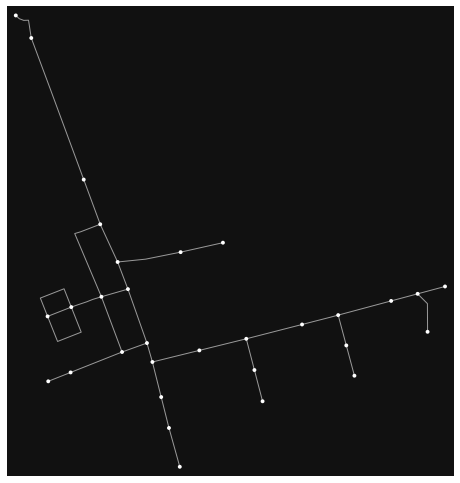

In [28]:
# plot subdivided graph
simp_graph = ox.utils_graph.get_undirected(simp_graph)

fig, ax = ox.plot_graph(simp_graph, show=False, close=False)
fig.set_figheight(13)

print('old:', graph_subdiv.number_of_nodes())
print('new:', simp_graph.number_of_nodes())

In [43]:
building_graph = simp_graph.copy()

for b_id, b_data in building_loads.iterrows():
    building_graph.add_node(b_id, x=b_data['centroid'].x, y=b_data['centroid'].y)
    line=LineString([b_data['centroid'], b_data['nn_coords']])
    building_graph.add_edge(b_id, b_data['nn'], geometry=line, length=line.length)

old: 31
new: 47


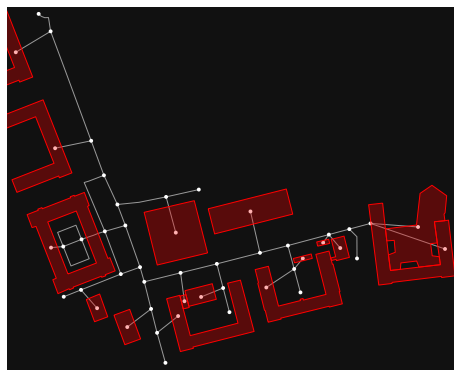

In [44]:
# plot building graph
fig, ax = ox.plot_graph(building_graph, show=False, close=False)
fig.set_figheight(13)
buildings.plot(ax=ax, edgecolor=(1,0,0,1), facecolor=(1,0,0,.3))

print('old:', simp_graph.number_of_nodes())
print('new:', building_graph.number_of_nodes())

# Clustering

In [45]:
# compute number of clusters

peak_load = building_loads.load.sum()
ons_no = int(np.ceil(peak_load/15000))

In [46]:
# prepare input data

X = []    # collect nodes
for node in simp_graph.nodes:
    X.append((simp_graph.nodes[node]['x'],simp_graph.nodes[node]['y']))
X = np.array(X)

#graph_test = ox.utils_graph.remove_isolated_nodes(simp_graph)
adj_mat_sparse = nx.adjacency_matrix(simp_graph)

In [47]:
# agglomerative clustering

from sklearn.cluster import AgglomerativeClustering

k = ons_no

clustering = AgglomerativeClustering(n_clusters=k, linkage='ward', connectivity=adj_mat_sparse).fit(X)
labels = clustering.labels_

k = np.bincount(labels).size
print(k)

2


In [48]:
'''i_label = 0

for node in list(simp_graph.nodes):

    simp_graph.nodes[node]['cluster'] = clustering.labels_[i_label]
    
    i_label += 1
    
labels = nx.get_node_attributes(simp_graph, 'cluster') 

nc = ox.plot.get_node_colors_by_attr(simp_graph, attr='cluster')
fig, ax = ox.plot_graph(simp_graph, node_color=nc, node_size=50, edge_color='w', edge_linewidth=1, show=False, close=False)

#assign cluster number to nodes
nodes, edges = ox.graph_to_gdfs(simp_graph, nodes=True, edges=True)
nodes = nodes.sort_index()

#get coordinates for cluster
cluster_coords = {key: [] for key in [i for i in range(k)]}

for i in range(k):
    df_coords = nodes[nodes['cluster'] == i]
    for index, rows in df_coords.iterrows():
        coords =[rows.x, rows.y]
        cluster_coords[i].append(coords)
        
#create hulls
for i in cluster_coords.keys():  
    hull = MultiPoint(points=cluster_coords[i]).convex_hull
    x,y = hull.exterior.xy
    ax.plot(x,y, color='yellow')
    
fig.set_figheight(13)'''

"i_label = 0\n\nfor node in list(simp_graph.nodes):\n\n    simp_graph.nodes[node]['cluster'] = clustering.labels_[i_label]\n    \n    i_label += 1\n    \nlabels = nx.get_node_attributes(simp_graph, 'cluster') \n\nnc = ox.plot.get_node_colors_by_attr(simp_graph, attr='cluster')\nfig, ax = ox.plot_graph(simp_graph, node_color=nc, node_size=50, edge_color='w', edge_linewidth=1, show=False, close=False)\n\n#assign cluster number to nodes\nnodes, edges = ox.graph_to_gdfs(simp_graph, nodes=True, edges=True)\nnodes = nodes.sort_index()\n\n#get coordinates for cluster\ncluster_coords = {key: [] for key in [i for i in range(k)]}\n\nfor i in range(k):\n    df_coords = nodes[nodes['cluster'] == i]\n    for index, rows in df_coords.iterrows():\n        coords =[rows.x, rows.y]\n        cluster_coords[i].append(coords)\n        \n#create hulls\nfor i in cluster_coords.keys():  \n    hull = MultiPoint(points=cluster_coords[i]).convex_hull\n    x,y = hull.exterior.xy\n    ax.plot(x,y, color='yellow')

,y,x,street_count,lon,lat,pos,geometry,cluster
osmid,,,,,,,,
70844016,2.728106e+06,4.279337e+06,3.0,9.445623,47.665163,NaN,POINT (4279336.535 2728105.680),0
1437615049,2.728124e+06,4.279409e+06,3.0,9.446586,47.665329,NaN,POINT (4279409.017 2728123.583),0
247479382,2.728120e+06,4.279332e+06,3.0,9.445566,47.665294,NaN,POINT (4279332.304 2728120.302),0
70844030,2.728190e+06,4.279358e+06,2.0,9.445905,47.665928,NaN,POINT (4279358.316 2728190.499),0
75739680,2.728198e+06,4.279391e+06,3.0,9.446339,47.665996,NaN,POINT (4279390.986 2728197.811),0
70844057,2.728183e+06,4.279310e+06,3.0,9.445258,47.665856,NaN,POINT (4279309.665 2728182.897),0
1511396101,2.728212e+06,4.279296e+06,3.0,9.445077,47.666117,NaN,POINT (4279296.222 2728212.044),0
1511396127,2.728162e+06,4.279318e+06,3.0,9.445367,47.665668,NaN,POINT (4279317.629 2728161.947),0
70844065,2.728025e+06,4.279358e+06,2.0,9.445913,47.664436,NaN,POINT (4279357.666 2728024.751),0


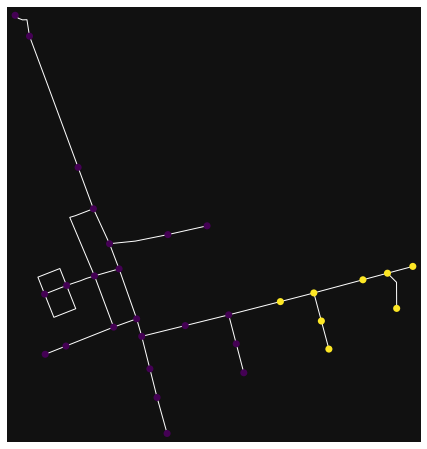

In [49]:
#assign cluster number to nodes
nodes, edges = ox.graph_to_gdfs(simp_graph, nodes=True, edges=True)
#nodes = nodes.sort_index()
nodes['cluster'] = labels
clu_graph = ox.graph_from_gdfs(nodes, edges)

nc = ox.plot.get_node_colors_by_attr(clu_graph, attr='cluster')
fig, ax = ox.plot_graph(clu_graph, node_color=nc, node_size=50, edge_color='w', edge_linewidth=1, show=False, close=False)

'''#get coordinates for cluster
cluster_coords = {key: [] for key in [i for i in range(k)]}

for i in range(k):
    df_coords = nodes[nodes['label'] == i]
    for index, rows in df_coords.iterrows():
        coords =[rows.x, rows.y]
        cluster_coords[i].append(coords)
        
G_kmed = ox.graph_from_gdfs(nodes, edges)
nc = ox.plot.get_node_colors_by_attr(G_kmed, attr='label')
fig, ax = ox.plot_graph(G_kmed, node_color=nc, node_size=50, edge_color='w', edge_linewidth=1, show=False, close=False)
        
#create hulls
for i in cluster_coords.keys():  
    hull = MultiPoint(points=cluster_coords[i]).convex_hull
    if hull.geom_type == 'LineString':
        x,y = hull.xy
        plt.plot(x,y, color='yellow')
    if hull.geom_type == 'Polygon':
        x,y = hull.exterior.xy
        plt.plot(x,y, color='yellow')
    
#unweighted medoids
medoids_un = []
#weighted medoids
medoids = []

for i in range(k):
    df_cluster = nodes[nodes['label'] == i]
    cluster_nodes = list(df_cluster.index)
    print(cluster_nodes)
    dm_clu = dm[cluster_nodes].loc[cluster_nodes]
    x = dm_clu.to_numpy()
    unweight = np.ones(len(cluster_nodes), dtype = int) 
    unweighted_nodes = unweight.dot(x) #cum distances
    #[0][0] -> more than one medoids possible
    medoid_un = cluster_nodes[int(np.where(unweighted_nodes == np.amin(unweighted_nodes))[0][0])]
    medoids_un.append(medoid_un)
    #weighted
    cluster_loads = df_node_load.loc[cluster_nodes]
    weight = np.array(list(cluster_loads['load']))
    weighted_nodes = weight.dot(x)
    medoid = cluster_nodes[int(np.where(weighted_nodes == np.amin(weighted_nodes))[0][0])]
    medoids.append(medoid)
    
for m in medoids_un:
    node = G_clu.nodes[m]
    ax.scatter(node['x'],node['y'],s=100,c='red')
    
for m in medoids:
    node = G_clu.nodes[m]
    ax.scatter(node['x'],node['y'],s=50,c='blue')
    
    
#bei k= 30 KeyError: '[2.4986004249860064e+16, 2.8301821144578145e+18, 2.830182125017794e+18, 1.4457814623062161e+19, 2.830184728301844e+16, 2.830182128301847e+16, 2.879416728301847e+16, 2.498599724985998e+16, 2.498600428794168e+16, 2.498600424986006e+16, 2.498600029121894e+16] not in index'
print(k)
fig.set_figheight(13)'''
nodes

In [50]:
# 500 - 1500 km
# ONS platzieren
# Distanzkriterium überprüfen
# ggf neues Cluster bilden (zerteilen)

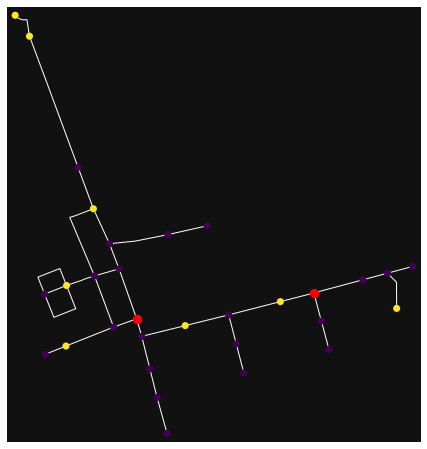

In [51]:
# medoids
import pandas as pd

cluster_graph = simp_graph.copy()

nc = ox.plot.get_node_colors_by_attr(clu_graph, attr='cluster')
fig, ax = ox.plot_graph(cluster_graph, node_color=nc, node_size=50, edge_color='w', edge_linewidth=1, show=False, close=False)

for i in range(k):
    df_cluster = nodes[nodes['cluster'] == i]
    cluster_nodes = list(df_cluster.index)
    cluster_subgraph = cluster_graph.subgraph(cluster_nodes)
    dm_cluster = nx.floyd_warshall_numpy(cluster_graph, nodelist=cluster_nodes, weight='length')
    load_vector = np.ones(len(cluster_nodes), dtype = int) #unweighted
    #load_vector = np.array(list(cluster_loads['load'])) #weighted
    unweighted_nodes = dm_cluster.dot(load_vector)
    medoid = cluster_nodes[int(np.where(unweighted_nodes == np.amin(unweighted_nodes))[0][0])]
    medoid = cluster_graph.nodes[medoid]
    ax.scatter(medoid['x'],medoid['y'],s=70,c='red')
    
# df = pd.DataFrame(dm_cluster)
# print(df)

In [52]:
building_loads

,load,centroid,nn,nn_coords
osmid,,,,
35318088,2029.709367,POINT (4279370.341 2728071.466),2311661359,POINT (4279349.308594686 2728054.726297357)
35318089,2456.745523,POINT (4279636.931 2728138.479),1412811562,POINT (4279562.500421067 2728163.994977429)
35318090,2223.891729,POINT (4279247.458 2728239.101),101404,POINT (4279283.483833885 2728246.541023344)
35318091,2258.340566,POINT (4279208.178 2728334.980),2927393554,POINT (4279242.971492188 2728355.884267616)
137821692,2124.080262,POINT (4279458.416 2728100.003),102101,POINT (4279486.263367083 2728118.477836892)
219628415,301.008592,POINT (4279532.283 2728139.392),102001,POINT (4279520.89616404 2728152.8379597)
219628416,52.331750,POINT (4279515.216 2728144.730),102001,POINT (4279520.89616404 2728152.8379597)
222184229,339.574916,POINT (4279289.400 2728079.322),102401,POINT (4279273.351943101 2728097.609097955)
433012948,82.705434,POINT (4279494.908 2728129.025),102101,POINT (4279486.263367083 2728118.477836892)


In [53]:
df = building_loads
df[df['nn'].isin([102001, 3840636444])]

,load,centroid,nn,nn_coords
osmid,,,,
219628415,301.008592,POINT (4279532.283 2728139.392),102001,POINT (4279520.89616404 2728152.8379597)
219628416,52.331750,POINT (4279515.216 2728144.730),102001,POINT (4279520.89616404 2728152.8379597)
2904857,3146.084758,POINT (4279243.377 2728139.799),3840636444,POINT (4279255.577455225 2728140.889206276)
